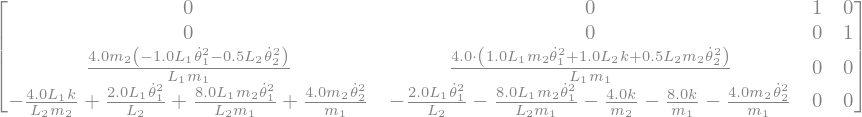

In [49]:
from sympy import *
from sympy.physics.mechanics import *
mechanics_printing(pretty_print=True)
op_point = {theta1: 0, theta2: 0}
theta1 = dynamicsymbols('theta1')     
theta2 = dynamicsymbols('theta2')            
theta1d = dynamicsymbols('theta1', 1)                    
theta2d = dynamicsymbols('theta2', 1)

t, L1, L2, m1, m2, k, g = symbols('t, L1, L2, m1, m2, k, g')

r_l1 = Matrix([[(L1/2)*cos(theta1), (-L1/2)*sin(theta1)]])

r_l2 = Matrix([[L1*cos(theta1)+(L2/2)*cos(theta2), (-L1*sin(theta1)-(L2/2)*sin(theta2))]])

def mag(vect):
    return sqrt(vect[0]**2+vect[1]**2)

vl1 = diff(r_l1, t)
vl2 = diff(r_l2, t)

vl1mag = simplify(mag(vl1))
vl2mag = simplify(mag(vl2))

T = .5*m1*(vl1mag)**2+.5*m2*(vl2mag)**2

V = .5*k*(L1*sin(theta1))**2+.5*k*(L1*sin(theta1)+L2*sin(theta2))**2 + (-m1*g*(.5*L1*sin(theta1))) + (-m2*g*(L1*sin(theta1)+L2*.5*sin(theta2)))

lagr = T-V
lagr

LM = LagrangesMethod(lagr, [theta1, theta2])
LM.form_lagranges_equations()

# print((LM.form_lagranges_equations()).subs({sin(theta1(t)): theta1(t), sin(theta2(t)): theta2(t), cos(theta1(t)): 1, cos(theta2(t)): 1}))

# LM = Matrix([[1.0*L1**2*k*theta1(t) + 0.25*L1**2*m1*Derivative(theta1(t), (t, 2)) + - 0.5*L1*g*m1 - L1*g*m2 + 1.0*L1*k*(L1*theta1(t) + L2*theta2(t)) + 0.5*m2*L1*L2*Derivative(theta2(t), (t, 2))], [-0.5*L2*g*m2 + 1.0*L2*k*(L1*theta1(t) + L2*theta2(t)) + 0.5*m2*(-L1*L2*(Derivative(theta1(t), t) + L1*L2*Derivative(theta1(t), (t, 2)) + L2**2*Derivative(theta2(t), (t, 2))/2))]])
# simplify(LM)
linearizer = LM.to_linearizer(q_ind=[theta1, theta2], qd_ind=[theta1d, theta2d])
A, B = linearizer.linearize(A_and_B=True, op_point=op_point)
simplify(A)

    

In [17]:
from sympy import *
from sympy.physics.mechanics import *
H, R, omega, t, theta, I, delta, M, m, k, g = symbols('H, R, omega, t, theta, I, delta, M, m, k, g')
gamma, eps = symbols('gamma, eps', cls=Function)

mechanics_printing(pretty_print=True)


def mag(vect):
    return sqrt(vect[0]**2+vect[1]**2)

gamma = atan2(eps(t), H)
theta = omega*t

rtrack = Matrix([H, eps(t)])

rpos = Matrix([[mag(rtrack)*cos(theta+gamma), mag(rtrack)*sin(gamma+theta)]])

vmmag = mag(diff(rpos, t))

krot = .5*I*omega**2


T = .5*m*vmmag**2+krot
V = k*eps(t)**2+m*g*(mag(rtrack)*sin(gamma+theta))+M*g*(delta*sin(theta))

lagr = T-V

LM = LagrangesMethod(lagr, [eps(t)])
simplify(LM.form_lagranges_equations())



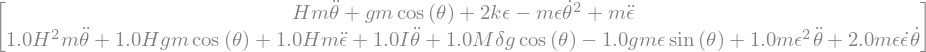

In [19]:
#now we remove prescribed motion

from sympy import *
from sympy.physics.mechanics import *
H, R, omega, t, theta, I, delta, M, m, k, g = symbols('H, R, omega, t, theta, I, delta, M, m, k, g')
epsilon, theta = symbols('epsilon, theta', cls=Function)

mechanics_printing(pretty_print=True)


def mag(vect):
    return sqrt(vect[0]**2+vect[1]**2)

gamma = atan2(epsilon(t), H)

rtrack = Matrix([H, epsilon(t)])

rpos = Matrix([[mag(rtrack)*cos(theta(t)+gamma), mag(rtrack)*sin(gamma+theta(t))]])

vmmag = mag(diff(rpos, t))

krot = .5*I*diff(theta(t),t)**2


T = .5*m*vmmag**2+krot
V = k*epsilon(t)**2+m*g*(mag(rtrack)*sin(gamma+theta(t)))+M*g*(delta*sin(theta(t)))

lagr = T-V

LM = LagrangesMethod(lagr, [epsilon(t), theta(t)])
simplify(LM.form_lagranges_equations())



In [11]:
from sympy import *
from sympy.physics.mechanics import *
mechanics_printing(pretty_print=True)
import numpy as np
from scipy.integrate import odeint

m1, m2, m3, m4, k1, k2, k3, k4, t, lmbda = symbols('m1, m2, m3, m4, k1, k2, k3, k4, t, lmbda')
x1, x2, x3, x, y = symbols('x1, x2, x3, x4, y', cls=Function)
a, b, c, d = symbols('a, b, c, d')

M = Matrix([[m1, 0, 0, 0],
            [0, m2, 0, 0],
            [0, 0, m3, 0],
            [0, 0, 0, m4]])

K = Matrix([[k1+k2+k4, -k2, -k4, 0],
            [-k2, k2+k3, -k3, 0],
            [-k4, -k3, 2*k4+k3, -k4],
            [0, 0, -k4, k4]])


def ddot(q):
    return diff(q, t, 2)

xddot = Matrix([[ddot(x1(t))],
                [ddot(x2(t))],
                [ddot(x3(t))],
                [ddot(x4(t))]])

x = Matrix([[x1(t), x2(t), x3(t), x4(t)]]).T

eq1 = Eq(det(M*lmbda**2+K), 0)

soln = solve(eq1, lmbda)

lmbdas = []
for i in range(len(soln)):
    lmbdas.append(soln[i])

#compute eigenvectors:
eigenvectors = []
for i in range(len(lmbdas)):
    eigenvectors.append((M*lmbdas[i]+K)).nullspace

#solving for modal coefficients when orthonormality is imposed:
modal_coeffs = [a, b, c, d]
for i in range(len(soln)):
    eq = Eq(modal_coeffs[i]**2*eigenvectors[i].T*M*eigenvectors, 1)
    soln = solve(eq, modal_coeffs[i])
    modal_coeffs[i]=soln[i]

#construct modal column matrices:
phi = []
for i in range(len(soln)):
    phi.append(eigenvectors[i]*modal_coeffs[i])

#construct modal matrix:
    
cap_phi = Matrix(BlockMatrix([phi[0], phi[1], phi[2], phi[3]]))

print(cap_phi.T*M*cap_phi==eye(1))

#uncoupled system:

unc = Eq(cap_phi.T*M*cap_phi*diff(y(t), t, 2)+cap_phi.T*K*cap_phi*y(t), 0)

#using numerical methods to solve uncoupled system:

# Define the system of equations
def system(y, t):
    y1, v1, y2, v2 = y
    dy1dt = v1
    dv1dt = -1.634 * y1
    dy2dt = v2
    dv2dt = -3.366 * y2
    return [dy1dt, dv1dt, dy2dt, dv2dt]

# Initial conditions: y1(0), v1(0), y2(0), v2(0)
initial_conditions = [1, 0, 1, 0]  # Example initial conditions

# Time points to solve the system at
t = np.linspace(0, 10, 250)  # from 0 to 10 seconds, 250 points

# Solve the differential equations
solution = odeint(system, initial_conditions, t)


SyntaxError: invalid syntax (2445852836.py, line 4)